### 区分求積法（数値積分）
$$
S = \int_a^b f(x)dx = \lim_{N\rightarrow \infty} \sum_{i}^{N} f(x_k) \Delta x 
$$
積分区間 $[a,b]$ をN等分した幅を$\Delta x$として、底辺が$\Delta x$で高さ$f(x_k)$の短冊の面積の和を定積分の近似値とする。
$\Delta x = \dfrac{b-a}{N}$

例　
$$
\int_0^1 x^2 dx = \frac{1}{3}
$$
を求め、近似値となることを確かめる。

In [6]:

import numpy as np
N = 100
x = np.linspace(0, 1, N+1)
x


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [9]:
delta = 1 / N
I = sum(xi**2 for xi in x) * delta 
I0 = 1/3
error = abs(I-I0)/I0*100 # 相対誤差％
print(I, error)

0.33835000000000004 1.5050000000000174


### 練習課題4
(1) $\int_0^\pi \sin{x} dx$

In [12]:
x = np.linspace(0, np.pi, N+1)
delta = np.pi / N
I = sum(np.sin(xi) for xi in x) * delta 
I0 = 2
error = abs(I-I0)/I0*100
print(I, error)

1.9998355038874436 0.00822480562782113


(2) $\int_0^1 e^{-x} dx$

In [14]:
x = np.linspace(0, 1, N+1)
delta = 1 / N
I = sum(np.exp(-xi) for xi in x) * delta 
I0 = 1 - np.exp(-1)
error = abs(I-I0)/I0*100
print(I, error) 

0.6389652236969589 1.0828100388137478


(3) $\int_4^9 x^{3/2} dx$ 

In [15]:
x = np.linspace(4, 9, N+1)
delta = (9-4) / N
I = sum(xi**(3/2) for xi in x) * delta
I0 = (3**5-2**5)*2/5
error = abs(I-I0)/I0*100
print(I, error) 

85.27531249971365 1.0371001181441277


### 台形公式
長方形で近似するのでなく、$(x_i, f(x_i)),(x_{i+1}, f(x_{i+1}))$ の2点使って台形の面積の和にしたもの。
$$
S = \sum_{k=0}^{N-1} \frac{f(x_{k+1})+f(x_k)}{2}\Delta x = \left(f_1 + f_N + 2(f_2+\cdots + f_{N-1})\right) \frac{\Delta x}{2}
$$

In [22]:
def f(x): return x**2
x = np.linspace(0, 1, N+1)
delta = 1 / N 
S = sum(f(xi) for xi in x[1:-1])*delta + (f(x[0])+f(x[-1]))/2*delta
S0 = 1/3
error = abs(S-S0)/S0
print(S, S0)

0.33335000000000004 0.3333333333333333


In [28]:
def f(x): return np.sin(x)
x = np.linspace(0, np.pi, N+1)
delta = np.pi / N 
S = sum(f(xi) for xi in x[0:-1])*delta + (f(x[0])+f(x[-1]))/2*delta 
S0 = 2
error = abs(S-S0)/S0*100 
print(S, error)
# 両端が0なので、2項目が0となり、長方形の場合と同一の値となる!

1.9998355038874436 0.00822480562782113


In [30]:
def f(x): return np.cos(x)
x = np.linspace(0, np.pi, N+1)
delta = np.pi / N
S1 = sum(f(xi) for xi in x)*delta 
S2 = sum(f(xi) for xi in x[0:-1])*delta + (f(x[0])+f(x[-1]))*delta / 2
S0 = 0
print(S0, S1, S2)

0 -2.37175057864587e-16 0.0314159265358977


In [23]:
def f(x): return np.exp(-x)
x = np.linspace(0, 1, N+1)
delta = 1/N 
S = sum(f(xi) for xi in x[1:-1])*delta +(f(x[0])+f(x[-1]))/2*delta 
S0 = 1-np.exp(-1)
error = abs(S-S0)/S0*100
print(S, error)

0.6321258264911017 0.0008333319444336135


In [34]:
def intg(f, a, b, N):
    x = np.linspace(a, b, N+1)
    delta = (b-a)/N
    S = sum(f(xi) for xi in x)*delta 
    print(S)

intg(lambda x: x**2, a=0, b=1, N=100)
intg(lambda x: np.sin(x), a=0, b=np.pi, N=100)
intg(lambda x: np.exp(-x), a=0, b=1, N=100)
intg(lambda x: x**(3/2), a=4, b=9, N=100)

0.33835000000000004
1.9998355038874436
0.6389652236969589
85.27531249971365


In [36]:
def trapz(f, a, b, N):
    x = np.linspace(a, b, N+1)
    delta = (b-a)/N 
    S = sum(f(xi) for xi in x[1:-1])*delta + (f(x[0])+f(x[-1]))/2*delta 
    print(S)
trapz(lambda x: x**2, a=0, b=1, N=100)
trapz(lambda x: np.sin(x), a=0, b=np.pi, N=100)
trapz(lambda x: np.exp(-x), a=0, b=1, N=100)
trapz(lambda x: x**(3/2), a=4, b=9, N=100)

0.33335000000000004
1.9998355038874436
0.6321258264911017
84.40031249971365


LinregressResult(slope=-1.000303348474383, intercept=2.1776258630469973, rvalue=-0.9999999663304249, pvalue=7.416351572782145e-12, stderr=0.00014986662329762412, intercept_stderr=0.000635830233643679)
LinregressResult(slope=-1.9998391456644242, intercept=1.6984863469537341, rvalue=-0.9999999966402385, pvalue=2.337741706278741e-13, stderr=9.464630411718968e-05, intercept_stderr=0.0004015502607330544)


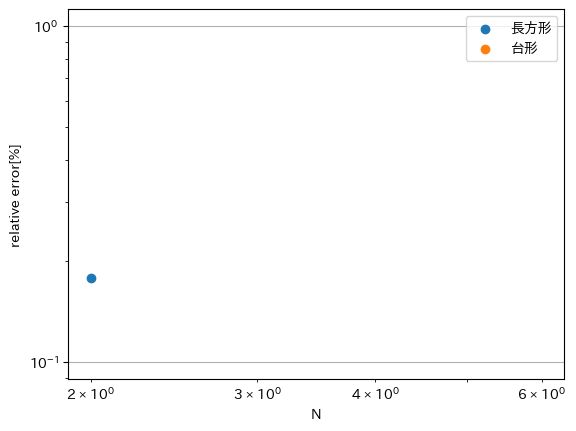

In [60]:
def intg(f, a, b, N):
    x = np.linspace(a, b, N+1)
    delta = (b-a)/N
    S = sum(f(xi) for xi in x)*delta 
    return S

def trapz(f, a, b, N):
    x = np.linspace(a, b, N+1)
    delta = (b-a)/N
    S = sum(f(xi) for xi in x[1:-1])*delta + (f(x[0])+f(x[-1]))/2*delta 
    return S

X = []
Y = []
Y1 = []
import matplotlib.pyplot as plt 
import japanize_matplotlib
def f1(x): return x**2
for n in range(2,7):
    nn = 10**n
    ret1 = intg(f1, a=0, b=1, N=nn)
    ret2 = trapz(f1, a=0, b=1, N=nn)
    ex = 1/3
    err1 = abs(ex-ret1)/ex*100
    err2 = abs(ex-ret2)/ex*100
    X.append(nn)
    Y.append(err1)
    Y1.append(err2)
from scipy.stats import linregress
X = np.array([np.log10(x) for x in X])
Y = np.array([np.log10(y) for y in Y])
ret = linregress(X, Y)
print(ret)
a = ret.slope
b = ret.intercept
Y1 = [np.log10(y) for y in Y1]
ret1 = linregress(X, Y1)
print(ret1)
a1 = ret1.slope
b1 = ret1.intercept
plt.scatter(X, Y, label='長方形')
plt.scatter(X, Y1, label='台形')
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel('relative error[%]')
#plt.plot(X, 10**b*X**a)
plt.show()
